In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf
import sys
sys.path.append("./../figures/")
sys.path.append("../")
from makeCorner import *
import json
from scipy.stats import gaussian_kde
import matplotlib as mpl
mpl.style.use('./../plotting.mplstyle')

az.rcParams["plot.max_subplots"] = 80

---
# Load and inspect inference output file

In [2]:
data = az.from_netcdf("pop1_300_events_fitMasses.cdf")
az.summary(data)

arviz - WARNING - Shape validation failed: input_shape: (1, 1500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
R30,2.628,0.506,1.725,3.589,0.017,0.012,811.0,1027.0,NaN
alpha,-3.883,0.173,-4.189,-3.551,0.006,0.004,930.0,1007.0,NaN
bq,0.864,0.396,0.123,1.582,0.012,0.009,1124.0,982.0,NaN
f_big,0.756,0.172,0.521,1.000,0.011,0.008,286.0,614.0,NaN
kappa,3.639,0.628,2.470,4.843,0.021,0.015,929.0,986.0,NaN
logR30,0.412,0.083,0.261,0.574,0.003,0.002,811.0,1027.0,NaN
log_dmMax,0.895,0.431,0.136,1.497,0.012,0.009,1226.0,699.0,NaN
log_dmMin,0.122,0.577,-0.851,0.996,0.014,0.017,1669.0,853.0,NaN
log_f_peak,-3.427,0.220,-3.870,-3.058,0.010,0.007,488.0,735.0,NaN
logit_f_big,0.237,2.398,-3.802,4.893,0.146,0.103,286.0,614.0,NaN


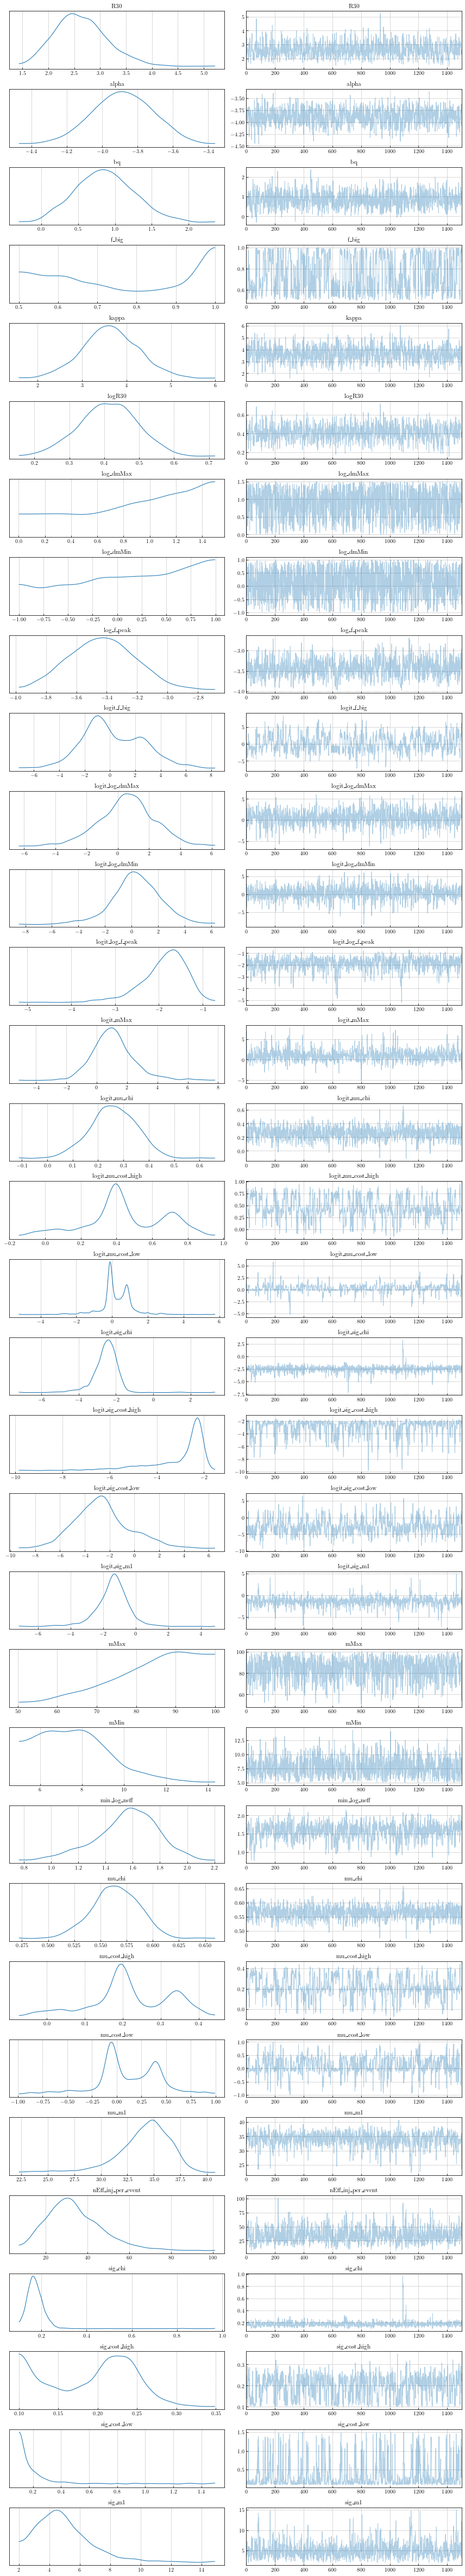

In [3]:
az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

Let's make a corner plot showing posteriors on our parameters:

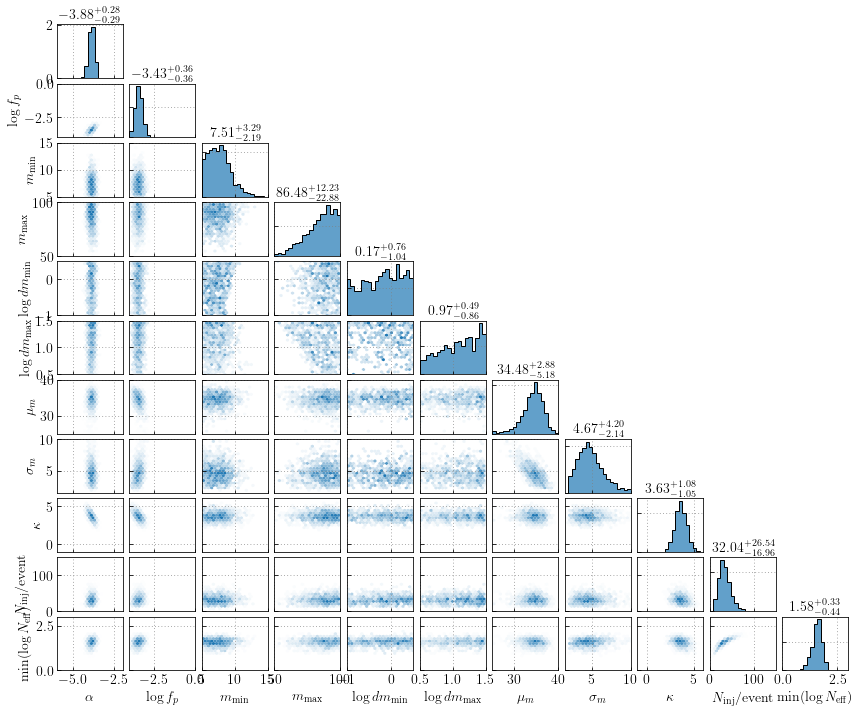

In [4]:
stacked_samples = data.posterior.stack(draws=("chain", "draw"))

fig = plt.figure(figsize=(12,10))
toPlot = {
    "alpha":{"data":stacked_samples.alpha,"plot_bounds":(-6,-2),"label":r"$\alpha$"},
    "log_f_peak":{"data":stacked_samples.log_f_peak,"plot_bounds":(-4,0),"label":r"$\log f_p$"},
    "mMin":{"data":stacked_samples.mMin,"plot_bounds":(5,15),"label":r"$m_\mathrm{min}$"},
    "mMax":{"data":stacked_samples.mMax,"plot_bounds":(50,100),"label":r"$m_\mathrm{max}$"},
    "dmMin":{"data":stacked_samples.log_dmMin,"plot_bounds":(-1,0.5),"label":r"$\log dm_\mathrm{min}$"},
    "dmMax":{"data":stacked_samples.log_dmMax,"plot_bounds":(0.5,1.5),"label":r"$\log dm_\mathrm{max}$"},
    "mu_m":{"data":stacked_samples.mu_m1,"plot_bounds":(25,40),"label":r"$\mu_m$"},
    "sig_m":{"data":stacked_samples.sig_m1,"plot_bounds":(1.5,10),"label":r"$\sigma_m$"},
    "kappa":{"data":stacked_samples.kappa,"plot_bounds":(-1,6),"label":r"$\kappa$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,150),"label":r"$N_\mathrm{inj}$/event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$"}
}
plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

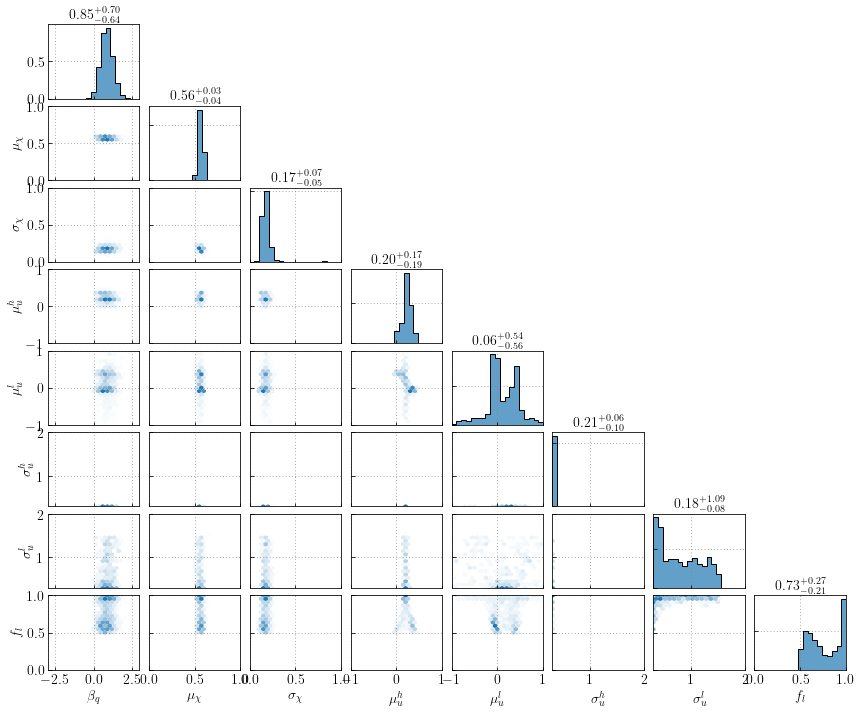

In [5]:
stacked_samples = data.posterior.stack(draws=("chain", "draw"))

fig = plt.figure(figsize=(12,10))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-3,3),"label":r"$\beta_q$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(0,1),"label":r"$\mu_\chi$"},
    "sig_chi":{"data":stacked_samples.sig_chi,"plot_bounds":(0,1),"label":r"$\sigma_\chi$"},
    "mu_cost_high":{"data":stacked_samples.mu_cost_high,"plot_bounds":(-1,1),"label":r"$\mu_u^h$"},
    "mu_cost_low":{"data":stacked_samples.mu_cost_low,"plot_bounds":(-1,1),"label":r"$\mu_u^l$"},
    "sig_cost_high":{"data":stacked_samples.sig_cost_high,"plot_bounds":(0.3,2),"label":r"$\sigma_u^h$"},
    "sig_cost_low":{"data":stacked_samples.sig_cost_low,"plot_bounds":(0.3,2),"label":r"$\sigma_u^l$"},
    "f_big":{"data":stacked_samples.f_big,"plot_bounds":(0.,1),"label":r"$f_l$"}
}
plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

---
# Prep distribution plotting

In [6]:
def gaussian(samples,mu,sigma,lowCutoff,highCutoff):
    
    """
    Function defining the probability density due to a truncated Gaussian
    """
    
    a = (lowCutoff-mu)/np.sqrt(2*sigma**2)
    b = (highCutoff-mu)/np.sqrt(2*sigma**2)
    norm = np.sqrt(sigma**2*np.pi/2)*(-erf(a) + erf(b))
    return np.exp(-(samples-mu)**2/(2.*sigma**2))/norm

def massModel(m1,alpha,mu_m1,sig_m1,f_peak,mMax,mMin,dmMax,dmMin):

    p_m1_pl = (1.+alpha)*m1**(alpha)/(100.**(1.+alpha) - 2.**(1.+alpha))
    p_m1_peak = np.exp(-(m1-mu_m1)**2/(2.*sig_m1**2))/np.sqrt(2.*np.pi*sig_m1**2)

    low_filter = np.exp(-(m1-mMin)**2/(2.*dmMin**2))
    low_filter = np.where(m1<mMin,low_filter,1.)
    high_filter = np.exp(-(m1-mMax)**2/(2.*dmMax**2))
    high_filter = np.where(m1>mMax,high_filter,1.)

    return (f_peak*p_m1_peak + (1.-f_peak)*p_m1_pl)*low_filter*high_filter

def p_astro_m1(m1, alpha=-3.51, mMin=6.00, mMax=88.21, mCut=None, lambda_peak=0.033, m0=33.61, sigM=4.72, deltaM=4.88, set_zeros=True):

    # assign mCut=mMin if not provided (standard case)
    if mCut is None:
        mCut = mMin
    
    # power law
    p_m1_pl = PL(m1, alpha, mMin, mMax)
    p_m1_pl[m1>mMax] = 0.

    # gaussian peak
    p_m1_peak = np.exp(-0.5*(m1-m0)**2./sigM**2)/np.sqrt(2.*np.pi*sigM**2.)

    # calculate scaling factor based off of mCut vs mMin
    scalefactor = PL(m0, alpha, mCut, mMax)/ PL(m0, alpha, mMin, mMax)

    # combine with the correct mixing fraction and scaling
    p_m1 = lambda_peak*p_m1_peak + (1.-lambda_peak)*p_m1_pl
    p_m1 = p_m1 * scalefactor

    # smoothing fxn 
    p_m1[m1<mMin+deltaM] = p_m1[m1<mMin+deltaM]*smoothing_fxn(m1[m1<mMin+deltaM]-mMin, deltaM)

    # min mass cut
    p_m1[m1<mCut]=0

    return p_m1

def PL(x, alpha, x_min, x_max):

    """
    Normalization power law with slope alpha, between x_min and x_max
    
    Parameters
    ----------
    x : `numpy.array`
        input samples 
    alpha : float
        apectral index for the power-law
    x_min : float
        min for the power-law
    x_max : float
        max for the power-law
    
    Returns
    -------
    pl : `numpy.array`
        the power law at samples x
    """

    pl = (1.+alpha)*x**alpha/(x_max**(1.+alpha) - x_min**(1.+alpha))
    return pl

def smoothing_fxn(m, deltaM):

    """
    Smoothing function that goes into the p_astro(m1,m2) calculation for the power law + peak mass model.
    See eqn. B5 in https://arxiv.org/pdf/2111.03634.pdf
    
    Parameters
    ----------
    m : `numpy.array`
        mass samples to calculate smoothing over
    deltaM : float
        Range of mass tapering at the lower end of the mass distribution
    
    Returns
    -------
    S : `numpy.array`
        the smoothing function evaluated at the input samples m
    """

    f = np.exp(deltaM/m + deltaM/(m-deltaM))
    S = 1/(f+1)

    return S

In [7]:
samps = data.posterior.stack(draws=("chain", "draw"))

---

# Calculate true injected rate

In [8]:
with open("../../injection-runs/input/injectionDict.json","r") as jf:
    injectionDict = json.load(jf)

for key in injectionDict:
    injectionDict[key] = np.array(injectionDict[key])

injectionDict['nTrials'] = len(injectionDict['m1'])

a1_det = injectionDict['a1']
a2_det = injectionDict['a2']
cost1_det = injectionDict['cost1']
cost2_det = injectionDict['cost2']
m1_det = injectionDict['m1']
m2_det = injectionDict['m2']
z_det = injectionDict['z']
dVdz_det = injectionDict['dVdz']

In [9]:
# Calculate target spin distributions
with open('../../injection-runs/input/underlying_population1_highSpinPrecessing_fullmassrange.json','r') as jf:
    popdata = json.load(jf)
    
s1x = np.array([popdata['s1x'][k] for k in popdata['s1x']])
s1y = np.array([popdata['s1y'][k] for k in popdata['s1y']])
s1z = np.array([popdata['s1z'][k] for k in popdata['s1z']])
s2x = np.array([popdata['s2x'][k] for k in popdata['s2x']])
s2y = np.array([popdata['s2y'][k] for k in popdata['s2y']])
s2z = np.array([popdata['s2z'][k] for k in popdata['s2z']])

a1 = np.sqrt(s1x**2 + s1y**2 + s1z**2)
a2 = np.sqrt(s2x**2 + s2y**2 + s2z**2)

cost1 = s1z/a1
cost2 = s2z/a2

cost_kde = gaussian_kde(np.concatenate([cost1,cost2]),bw_method=0.1)
chi_kde = gaussian_kde(np.concatenate([a1,a2]),bw_method=0.1)

In [10]:
# Compute true mass distribution
f_m1_true = p_astro_m1(m1_det,mCut=8.)
f_m1_ref = p_astro_m1(np.array([30.]),mCut=8.)

bq_true = 0.96 ##???
p_m2_true = (1.+bq_true)*m2_det**bq_true/(m1_det**(1.+bq_true) - 8.**(1.+bq_true))

kappa_true = 2.7
f_z_ref = (1.+0.2)**kappa_true
f_z_true = (1.+z_det)**(kappa_true-1)*dVdz_det

In [11]:
p_a1_true = chi_kde(a1_det) + chi_kde(-a1_det) + chi_kde(2.-a1_det)
p_a2_true = chi_kde(a2_det) + chi_kde(-a2_det) + chi_kde(2.-a2_det)
p_cost1_true = cost_kde(cost1_det) + cost_kde(-2.-cost1_det) + cost_kde(2.-cost1_det)
p_cost2_true = cost_kde(cost2_det) + cost_kde(-2.-cost2_det) + cost_kde(2.-cost2_det)

In [12]:
dRdx_unnormed = (f_m1_true/f_m1_ref)*p_m2_true*p_a1_true*p_a2_true*p_cost1_true*p_cost2_true*(f_z_true/f_z_ref)
mc_sum = np.sum(dRdx_unnormed/(injectionDict['p_draw_m1m2z']*injectionDict['p_draw_a1a2cost1cost2']))/injectionDict['nTrials']

R_ref_true = 300./mc_sum
R_ref_true

3.243889199562904

---
# Recovered mass distribution

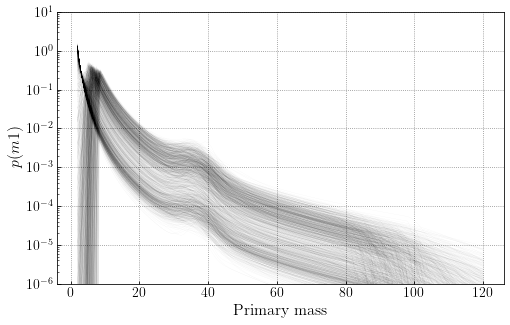

In [13]:
fig,ax = plt.subplots(figsize=(8,5))
m_grid = np.linspace(2,120,500)
for i in range(samps.alpha.size):
    
    p_m = massModel(m_grid,samps.alpha.values[i],samps.mu_m1.values[i],samps.sig_m1.values[i],
                    10.**samps.log_f_peak.values[i],samps.mMax.values[i],samps.mMin.values[i],
                    10.**samps.log_dmMax.values[i],10.**samps.log_dmMin.values[i])    
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='black',lw=0.1,alpha=0.1)
    
ax.set_xlabel('Primary mass')
ax.set_ylabel('$p(m1)$')
ax.set_yscale('log')
ax.set_ylim(1e-6,1e1)
plt.show()

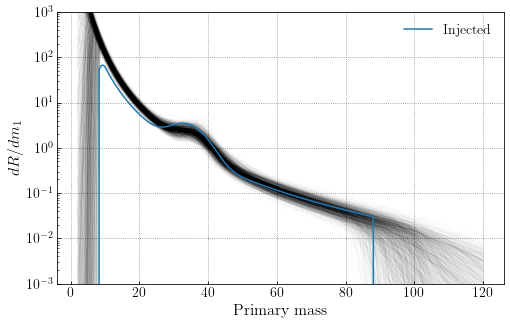

In [20]:
fig,ax = plt.subplots(figsize=(8,5))
m_grid = np.linspace(2,120,500)
for i in range(samps.alpha.size):
    
    p_m = massModel(m_grid,samps.alpha.values[i],samps.mu_m1.values[i],samps.sig_m1.values[i],
                    10.**samps.log_f_peak.values[i],samps.mMax.values[i],samps.mMin.values[i],
                    10.**samps.log_dmMax.values[i],10.**samps.log_dmMin.values[i])
    p_m_norm = massModel(30.,samps.alpha.values[i],samps.mu_m1.values[i],samps.sig_m1.values[i],
                    10.**samps.log_f_peak.values[i],samps.mMax.values[i],samps.mMin.values[i],
                    10.**samps.log_dmMax.values[i],10.**samps.log_dmMin.values[i])
    ax.plot(m_grid,samps.R30.values[i]*p_m/p_m_norm,color='black',lw=0.1,alpha=0.1)
    

m1s = np.linspace(2,120,300)
f_m1s = p_astro_m1(m1s,mCut=8.)
f_m1s_ref = p_astro_m1(np.array([30]),mCut=8.)
ax.plot(m1s,R_ref_true*f_m1s/f_m1s_ref,label='Injected')
    
ax.legend()
ax.set_xlabel('Primary mass')
ax.set_ylabel('$dR/dm_1$')
ax.set_yscale('log')
ax.set_ylim(1e-3,1e3)
plt.show()

---
# Spin distributions

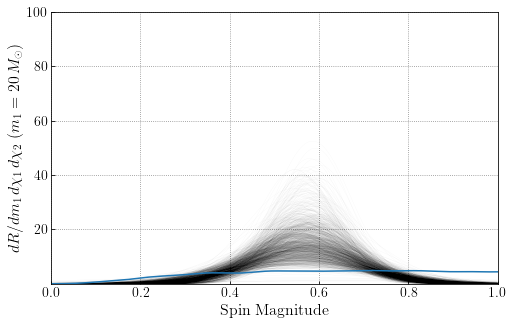

In [16]:
fig,ax = plt.subplots(figsize=(8,5))

chi_grid = np.linspace(0,1,500)
for i in range(samps.alpha.size):
    
    p_chi = gaussian(chi_grid,samps.mu_chi.values[i],samps.sig_chi.values[i],-1,1)
    R_chi = samps.R30.values[i]*p_chi**2
    ax.plot(chi_grid,R_chi,color='black',lw=0.1,alpha=0.1)
    
y_vals_chi = chi_kde(chi_grid) + chi_kde(2.-chi_grid)
ax.plot(chi_grid,R_ref_true*y_vals_chi**2)
    
ax.set_xlabel('Spin Magnitude')
ax.set_ylabel(r'$dR/dm_1\,d\chi_1\,d\chi_2$ ($m_1=20\,M_\odot$)')
ax.set_xlim(0,1)
ax.set_ylim(1e-2,1e2)
#ax.set_yscale('log')
plt.show()

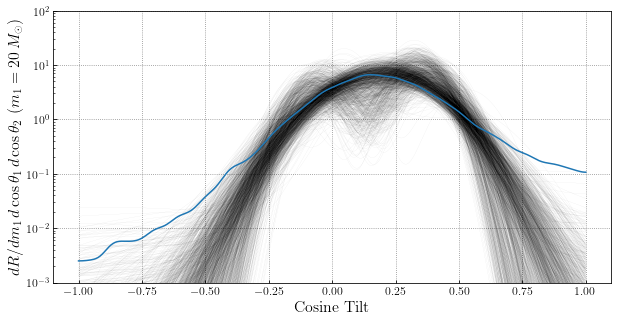

In [17]:
fig,ax = plt.subplots(figsize=(10,5))

cost_grid = np.linspace(-1,1,500)
for i in range(samps.alpha.size):
    
    p_cost_high = gaussian(cost_grid,samps.mu_cost_high.values[i],samps.sig_cost_high.values[i],-1,1)
    p_cost_low = gaussian(cost_grid,samps.mu_cost_low.values[i],samps.sig_cost_low.values[i],-1,1)
    p_cost = (1.-samps.f_big.values[i])*p_cost_low + samps.f_big.values[i]*p_cost_high
    R_cost = samps.R30.values[i]*p_cost**2
    
    ax.plot(cost_grid,R_cost,color='black',lw=0.1,alpha=0.2)
    
y_vals = cost_kde(cost_grid) + cost_kde(2.-cost_grid) + cost_kde(-2.-cost_grid)
ax.plot(cost_grid,R_ref_true*y_vals**2)
    
ax.set_xlabel('Cosine Tilt')
ax.set_ylabel(r'$dR/dm_1\,d\cos\theta_1\,d\cos\theta_2$ ($m_1=20\,M_\odot$)')
ax.set_yscale('log')
ax.set_ylim(1e-3,1e2)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

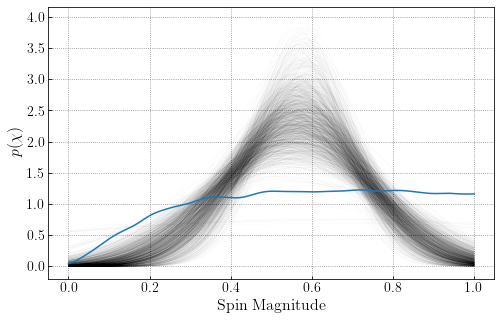

In [18]:
fig,ax = plt.subplots(figsize=(8,5))
grid = np.linspace(0,1,1000)
for i in range(samps.mu_chi.size):
    
    p_chi = gaussian(grid,samps.mu_chi.values[i],samps.sig_chi.values[i],-1,1)
    ax.plot(grid,p_chi,color='black',lw=0.1,alpha=0.1)
    
ax.set_xlabel('Spin Magnitude')
ax.set_ylabel('$p(\chi)$')
ax.plot(chi_grid,y_vals_chi)
plt.show()

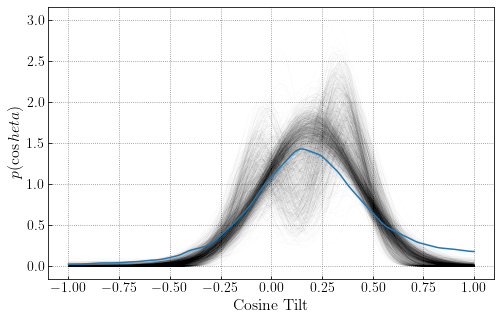

In [19]:
fig,ax = plt.subplots(figsize=(8,5))
grid = np.linspace(-1,1,1000)
for i in range(samps.mu_chi.size):
    
    p_cost_high = gaussian(grid,samps.mu_cost_high.values[i],samps.sig_cost_high.values[i],-1,1)
    p_cost_low = gaussian(grid,samps.mu_cost_low.values[i],samps.sig_cost_low.values[i],-1,1)
    p_cost = (1.-samps.f_big.values[i])*p_cost_low + samps.f_big.values[i]*p_cost_high

    ax.plot(grid,p_cost,color='black',lw=0.1,alpha=0.1)
    
ax.set_xlabel('Cosine Tilt')
ax.set_ylabel('$p(\cos\theta)$')
ax.plot(cost_grid,y_vals)
plt.show()